In [148]:
import pandas as pd
import numpy as np


In [149]:
import seaborn as sn
import matplotlib.pyplot as plt

# Read data

In [209]:
data = pd.read_csv('full_data_clustered_ssim.csv')
data = data.replace(np.nan,'None')

In [151]:
data = data.drop(columns=['cluster'])

In [152]:
data.columns

Index(['CVE ID', 'Publish Date', 'Update Date',
       'Number Of Related Vulnerabilities', 'index', 'CWE ID',
       'Vulnerability Type(s)', 'Score', 'Access', 'Complexity',
       'Authentication', 'Conf.', 'Integ.', 'Avail', 'CVE Summary',
       'Vulnerability Name', 'Vulnerability Description', 'CLEAN TEXT',
       'cluster_2', 'CI SCORE'],
      dtype='object')

In [153]:
for col in data.columns:
    print(data[col].nunique(),'\t',col)

61698 	 CVE ID
1347 	 Publish Date
1306 	 Update Date
122 	 Number Of Related Vulnerabilities
61698 	 index
261 	 CWE ID
136 	 Vulnerability Type(s)
62 	 Score
4 	 Access
4 	 Complexity
3 	 Authentication
4 	 Conf.
4 	 Integ.
4 	 Avail
58934 	 CVE Summary
261 	 Vulnerability Name
261 	 Vulnerability Description
54335 	 CLEAN TEXT
3 	 cluster_2
52905 	 CI SCORE


In [154]:
data[['Number Of Related Vulnerabilities','Vulnerability Type(s)','Score','Access', 'Complexity',
     'Authentication', 'Conf.', 'Integ.', 'Avail']]

Number Of Related Vulnerabilities Vulnerability Type(s)  Score  Access  \
0                                22413.0                   XSS    4.3  Remote   
1                                 3011.0               Unknown    7.5  Remote   
2                                  754.0               Unknown    5.8  Remote   
3                                 9380.0               Unknown    5.0  Remote   
4                                  394.0               Unknown    2.1   Local   
...                                  ...                   ...    ...     ...   
61693                            22413.0                   XSS    4.3  Remote   
61694                             1320.0                   DoS    5.0  Remote   
61695                              754.0               Unknown    5.8  Remote   
61696                            22413.0                   XSS    4.3  Remote   
61697                              403.0               Unknown    5.0  Remote   

      Complexity Authentication    Conf.   Integ.    Avail  
0         Medium   Not required     None  Partial     None  
1            Low   Not required  Partial  Partial  Partial  
2         Medium   Not required  Partial  Partial     None  
3            Low   Not required     None  Partial     None  
4            Low   Not required  Partial     None     None  
...          ...            ...      ...      ...      ...  
61693     Medium   Not required     None  Partial     None  
61694        Low   Not required     None     None  Partial  
61695     Medium   Not required  Partial  Partial     None  
61696     Medium   Not required     None  Partial     None  
61697        Low   Not required  Partial     None     None  

[61698 rows x 9 columns]

# OHE

In [155]:
labelencd_cols = ['Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail']

ohe = pd.concat([
    pd.get_dummies(data[labelencd_cols], dtype=int), 
    data['Score'],
    data['Number Of Related Vulnerabilities']
], axis=1)

ohe

Vulnerability Type(s)_+Info  Vulnerability Type(s)_+Info CSRF  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   
...                            ...                               ...   
61693                            0                                 0   
61694                            0                                 0   
61695                            0                                 0   
61696                            0                                 0   
61697                            0                                 0   

       Vulnerability Type(s)_+Info File Inclusion  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
61693                                           0   
61694                                           0   
61695                                           0   
61696                                           0   
61697                                           0   

       Vulnerability Type(s)_+Priv  Vulnerability Type(s)_+Priv +Info  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   
...                            ...                                ...   
61693                            0                                  0   
61694                            0                                  0   
61695                            0                                  0   
61696                            0                                  0   
61697                            0                                  0   

       Vulnerability Type(s)_+Priv Bypass  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
61693                                   0   
61694                                   0   
61695                                   0   
61696                                   0   
61697                                   0   

       Vulnerability Type(s)_+Priv Bypass +Info  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
61693                                         0   
61694                                         0   
61695                                         0   
61696                                         0   
61697                                         0   

       Vulnerability Type(s)_+Priv CSRF  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
61693                                 0   
61694                                 0   
61695                                 0   
61696                                 0   
6

In [79]:
for col in data[labelencd_cols].columns:
    print(data[col].nunique(),'\t',col)

136 	 Vulnerability Type(s)
261 	 Vulnerability Name
4 	 Access
4 	 Complexity
3 	 Authentication
4 	 Conf.
4 	 Integ.
4 	 Avail


# KMeans

In [156]:
# fit the preprocessed data
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k)
kmeans_clusters = kmeans.fit_predict(ohe)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [157]:
np.unique(kmeans.labels_)

array([0, 1])

In [158]:
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = ohe.index.values
cluster_map['index_clustermap'] = range(1,len(ohe)+1)
cluster_map['Kmeans_clusters'] = kmeans.labels_
cluster_map

index_clustermap  Kmeans_clusters
0                     1                1
1                     2                0
2                     3                0
3                     4                0
4                     5                0
...                 ...              ...
61693             61694                1
61694             61695                0
61695             61696                0
61696             61697                1
61697             61698                0

[61698 rows x 2 columns]

In [336]:
cols = ['index','Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail'
       ,'Score','Number Of Related Vulnerabilities']

clustered_data = pd.concat([data[cols] , cluster_map['Kmeans_clusters']] , axis=1)
clustered_data

index Vulnerability Type(s)  \
0          1                   XSS   
1          2               Unknown   
2          3               Unknown   
3          4               Unknown   
4          5               Unknown   
...      ...                   ...   
61693  61694                   XSS   
61694  61695                   DoS   
61695  61696               Unknown   
61696  61697                   XSS   
61697  61698               Unknown   

                                      Vulnerability Name  Access Complexity  \
0      Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
1                                Improper Authentication  Remote        Low   
2      URL Redirection to Untrusted Site ('Open Redir...  Remote     Medium   
3                              Improper Input Validation  Remote        Low   
4                                            Double Free   Local        Low   
...                                                  ...     ...        ...   
61693  Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
61694  Uncontrolled Resource Consumption ('Resource E...  Remote        Low   
61695  URL Redirection to Untrusted Site ('Open Redir...  Remote     Medium   
61696  Failure to Preserve Web Page Structure ('Cross...  Remote     Medium   
61697    Cleartext Transmission of Sensitive Information  Remote        Low   

      Authentication    Conf.   Integ.    Avail  Score  \
0       Not required     None  Partial     None    4.3   
1       Not required  Partial  Partial  Partial    7.5   
2       Not required  Partial  Partial     None    5.8   
3       Not required     None  Partial     None    5.0   
4       Not required  Partial     None     None    2.1   
...              ...      ...      ...      ...    ...   
61693   Not required     None  Partial     None    4.3   
61694   Not required     None     None  Partial    5.0   
61695   Not required  Partial  Partial     None    5.8   
61696   Not required     None  Partial     None    4.3   
61697   Not required  Partial     None     None    5.0   

       Number Of Related Vulnerabilities  Kmeans_clusters  
0                                22413.0                1  
1                                 3011.0                0  
2                                  754.0                0  
3                                 9380.0                0  
4                                  394.0                0  
...                                  ...              ...  
61693                            22413.0                1  
61694                             1320.0                0  
61695                              754.0                0  
61696                            22413.0                1  
61697                              403.0                0  

[61698 rows x 12 columns]

In [337]:
print(clustered_data["Kmeans_clusters"].value_counts())


Kmeans_clusters
0    51386
1    10312
Name: count, dtype: int64


In [338]:
len(kmeans_clusters)

61698

# Plots Clusters

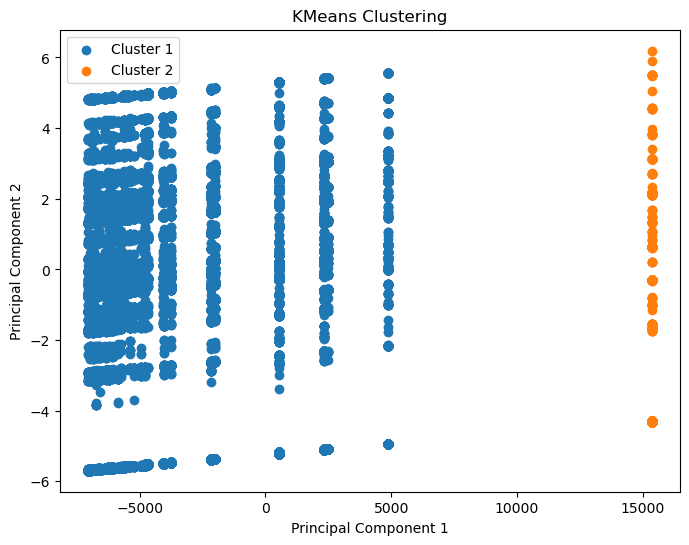

In [162]:
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(reduced_data[kmeans_clusters == i, 0], reduced_data[kmeans_clusters == i, 1], label=f'Cluster {i+1}')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


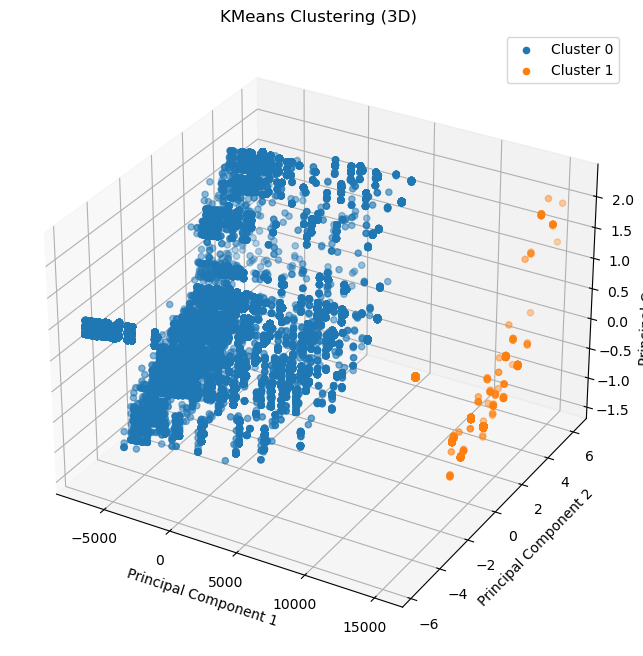

In [163]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ohe)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced_data[kmeans_clusters == i, 0], reduced_data[kmeans_clusters == i, 1], 
               reduced_data[kmeans_clusters == i, 2], label=f'Cluster {i}')

ax.set_title('KMeans Clustering (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [164]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA

n_clusters = 2

# Applying PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(ohe)

# Create a trace for each cluster
dataa = []
for i in range(n_clusters):
    trace = go.Scatter3d(
        x=reduced_data[kmeans_clusters == i, 0],
        y=reduced_data[kmeans_clusters == i, 1],
        z=reduced_data[kmeans_clusters == i, 2],
        mode='markers',
        name=f'Cluster {i}',
        marker=dict(size=5)
    )
    dataa.append(trace)

# Create the layout for the plot
layout = go.Layout(
    title='KMeans Clustering (3D)',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
    )
)

# Create the figure and plot it
fig = go.Figure(data=dataa, layout=layout)
fig.show()


In [167]:
kmeans_clusters

array([1, 0, 0, ..., 0, 1, 0])

# Metrics

In [92]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Calculate the silhouette score (ranges from -1 to 1, higher is better)
silhouette_avg = silhouette_score(ohe, kmeans_clusters)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin index (lower is better)
davies_bouldin_avg = davies_bouldin_score(ohe, kmeans_clusters)
print("Davies-Bouldin Index:", davies_bouldin_avg)

# Get the sum of squared distances of samples to their closest cluster center (inertia)
inertia = kmeans.inertia_
print("Inertia:", inertia)


Silhouette Score: 0.803723781830307
Davies-Bouldin Index: 0.17192036287384005
Inertia: 650391861391.8457


In [93]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score_avg = calinski_harabasz_score(ohe, kmeans_clusters)
print("Calinski Score:", calinski_harabasz_score_avg)

Calinski Score: 276843.5961409916


## CI Scores Analysis for Assign labels

In [169]:
clustered_data['Kmeans_clusters']

0        1
1        0
2        0
3        0
4        0
        ..
61693    1
61694    0
61695    0
61696    1
61697    0
Name: Kmeans_clusters, Length: 61698, dtype: int32

In [339]:
# df = pd.concat([data,clustered_data['Kmeans_clusters']],axis=1)
df = pd.concat([clustered_data,data['CI SCORE']],axis=1)

In [340]:
#Imbalenced data
df['Kmeans_clusters'].value_counts()

Kmeans_clusters
0    51386
1    10312
Name: count, dtype: int64

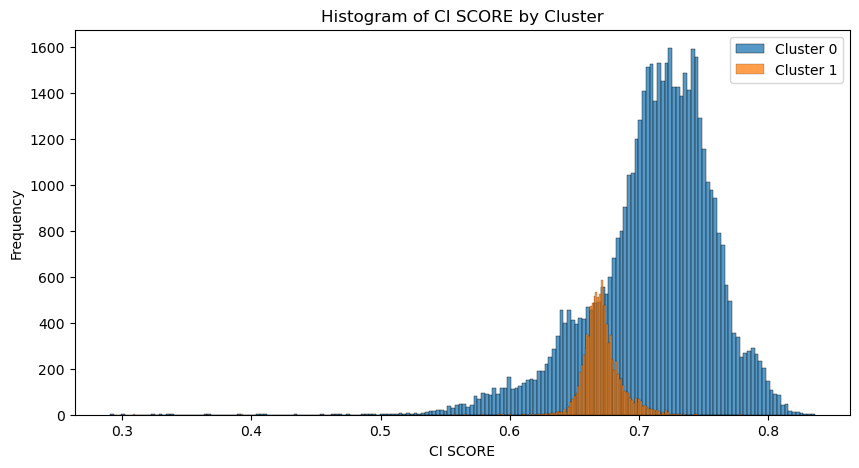

In [341]:
# distribution for each cluster
cluster_0 = df[df['Kmeans_clusters']==0]
cluster_0_scores = cluster_0['CI SCORE']
cluster_1 = df[df['Kmeans_clusters']==1]
cluster_1_scores = cluster_1['CI SCORE']

plt.figure(figsize=(10,5))
sn.histplot(cluster_0_scores,label='Cluster 0')
sn.histplot(cluster_1_scores,label='Cluster 1')

plt.title('Histogram of CI SCORE by Cluster')
plt.xlabel('CI SCORE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [342]:
df.groupby('Kmeans_clusters')['CI SCORE'].mean()

Kmeans_clusters
0    0.711260
1    0.671589
Name: CI SCORE, dtype: float64

In [343]:
threshold = (0.711260 + 0.671589) / 2
threshold

0.6914245

## Remove based on threshold = 0.69

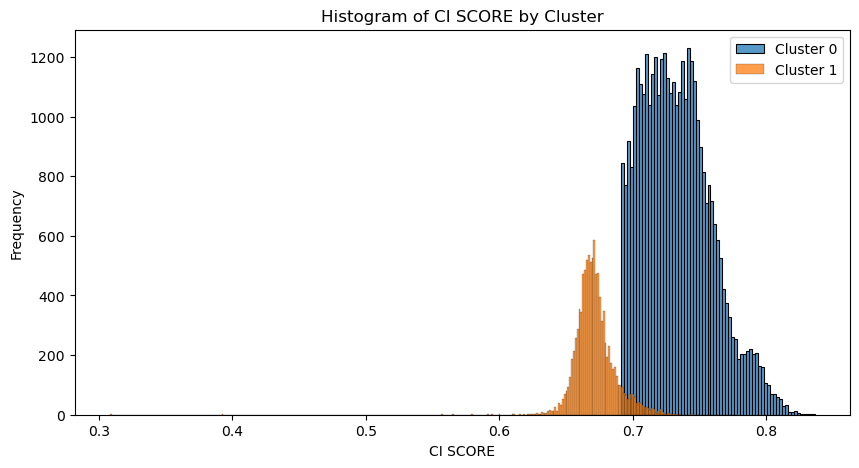

In [357]:
cluster_0_reduced = cluster_0[cluster_0['CI SCORE'] > threshold]
cluster_0_reduced_scores = cluster_0_reduced['CI SCORE']

# cluster_1_reduced = cluster_1[cluster_1['CI SCORE'] < threshold]
# cluster_1_reduced_scores = cluster_1_reduced['CI SCORE']

plt.figure(figsize=(10,5))
sn.histplot(cluster_0_reduced_scores,label='Cluster 0')
sn.histplot(cluster_1_scores,label='Cluster 1')

plt.title('Histogram of CI SCORE by Cluster')
plt.xlabel('CI SCORE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [358]:
# 0 : Critical Infrastructure
# 1 : Non CI

In [360]:
cluster_0_reduced.shape[0] , cluster_1.shape[0] ,"=", cluster_0_reduced.shape[0] + cluster_1.shape[0]

(37664, 10312, '=', 47976)

In [361]:
df.shape

(61698, 13)

In [364]:
df_reduced = pd.concat([cluster_0_reduced,cluster_1],axis=0)
df_reduced['Kmeans_clusters'].value_counts()

Kmeans_clusters
0    37664
1    10312
Name: count, dtype: int64

In [365]:
df['Kmeans_clusters'].value_counts()

Kmeans_clusters
0    51386
1    10312
Name: count, dtype: int64

In [366]:
51386-37664

13722

## CI SCORES Updates

In [275]:
import gensim.downloader as api

# wv = api.load('word2vec-google-news-300')
wv = api.load('glove-twitter-25')



In [145]:
wv
wv.similarity(w1="great",w2="good ")
wv.most_similar('good')